In [1]:
import os 
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

In [2]:
from robot.kuka_robot import KukaRobot
from robot.extend_kuka_robot import ExtendKukaRobot
from robot.snake_robot import SnakeRobot
from robot.ur5_robot import UR5Robot
from robot.abstract_robot import DynamicRobotFactory
from objects.trajectory import WaypointLinearTrajectory

In [3]:
def create_image(robot, distance):    
    p.resetSimulation()
    p.setAdditionalSearchPath(pybullet_data.getDataPath())
    plane = p.createCollisionShape(p.GEOM_PLANE)
    p.createMultiBody(0, plane)    
    p.configureDebugVisualizer(p.COV_ENABLE_GUI, 0, lightPosition = [0, 0, 0.1])
    p.resetDebugVisualizerCamera(
        cameraDistance=distance,
        cameraYaw=10,
        cameraPitch=-45,
        cameraTargetPosition=[0, 0, 0])    
    robot.load()
    robot.set_config_at_time(np.random.uniform(low=0, high=len(robot.trajectory.waypoints)-1))
    image = p.getCameraImage(width=360, height=360, lightDirection=[0, 0, -1], shadow=0, renderer=p.ER_BULLET_HARDWARE_OPENGL)[2]        
    return image

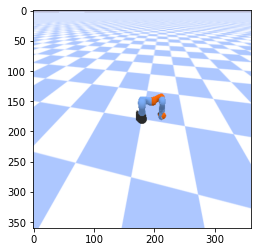

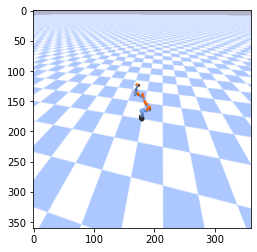

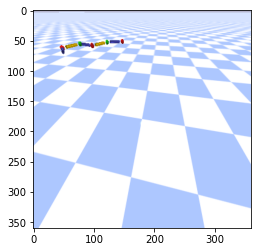

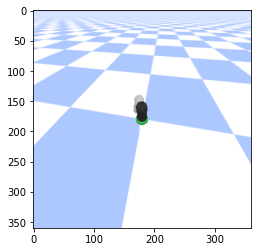

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import numpy as np
p.connect(p.GUI)
for Robot, distance in zip([KukaRobot, ExtendKukaRobot, SnakeRobot, UR5Robot], [2, 4, 2, 1]):
    plt.clf()
    plt.close('all')
    robot = Robot()
    DynamicRobot = DynamicRobotFactory.create_dynamic_robot_class(Robot)
    dynamic_robot = DynamicRobot(trajectory=WaypointLinearTrajectory(np.random.uniform(low=robot.limits_low, high=robot.limits_high, size=(10, robot.config_dim))))
    plt.imshow(create_image(dynamic_robot, distance))
    plt.show()
p.disconnect()    